In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "results/test_file.csv"
df = pd.read_csv(file_path, index_col=False)
df = df.loc[df.track_id==2]
df.head()

,track_id,input1_latitude,input1_longitude,input2_latitude,input2_longitude,input3_latitude,input3_longitude,input4_latitude,input4_longitude,target_latitude,target_longitude,prediction_latitude,prediction_longitude
7,2,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.5,-0.1,2.0,"[0.020824074745178223, 0.0177445188164711, -0....","[1.8990029096603394, 1.9924280643463135, 1.986..."
8,2,0.0,0.5,0.0,1.0,0.0,1.5,-0.1,2.0,-0.3,2.2,"[-0.17447298765182495, -0.3009862005710602, -0...","[2.4807562828063965, 2.5241310596466064, 2.388..."
9,2,0.0,1.0,0.0,1.5,-0.1,2.0,-0.3,2.2,-0.7,2.1,"[-0.5825176239013672, -0.5430954694747925, -0....","[2.6264610290527344, 2.6024601459503174, 2.216..."
10,2,0.0,1.5,-0.1,2.0,-0.3,2.2,-0.7,2.1,-1.1,1.8,"[-1.2085498571395874, -1.0735023021697998, -1....","[2.0126476287841797, 2.430894374847412, 1.7487..."
11,2,-0.1,2.0,-0.3,2.2,-0.7,2.1,-1.1,1.8,-1.5,1.5,"[-1.6545888185501099, -1.7907216548919678, -1....","[1.3287409543991089, 1.3422915935516357, 1.539..."


In [3]:
index = np.random.randint(0, 15)

In [20]:

def get_confidence_interval_of_target(index):
    # Data
    data_lat = np.array(df.prediction_latitude.apply(lambda x: np.array(eval(x))).tolist())[index]
    data_long = np.array(df.prediction_longitude.apply(lambda x: np.array(eval(x))).tolist())[index]
    data = np.vstack((data_lat, data_long))
    data.min(axis=1), data.max(axis=1)

    _mean, _cov = np.mean(data, axis=1), np.cov(data)
    _mean, _cov
    
    from scipy.stats import multivariate_normal
    
    dist = multivariate_normal(mean=_mean, cov=_cov)

    x = np.linspace(_mean[0]-1, _mean[0]+1, 100)
    y = np.linspace(_mean[1]-1, _mean[1]+1, 100)

    xx, yy = np.meshgrid(x, y)

    pdf = np.zeros((100, 100))

    for i in range(100):
        for j in range(100):
            pdf[i, j] = dist.pdf([xx[i, j], yy[i, j]])

    return xx, yy, pdf


In [21]:
input_lat = np.array([df.input1_latitude, df.input2_latitude, df.input3_latitude, df.input4_latitude])
input_lat = np.transpose(input_lat)
print(input_lat)

input_long = np.array([df.input1_longitude, df.input2_longitude, df.input3_longitude, df.input4_longitude])
input_long = np.transpose(input_long)
print(input_lat[0])

[[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.1       ]
 [ 0.          0.         -0.1        -0.30000001]
 [ 0.         -0.1        -0.30000001 -0.69999999]
 [-0.1        -0.30000001 -0.69999999 -1.10000002]
 [-0.30000001 -0.69999999 -1.10000002 -1.5       ]
 [-0.69999999 -1.10000002 -1.5        -1.89999998]
 [-1.10000002 -1.5        -1.89999998 -2.29999995]
 [-1.5        -1.89999998 -2.29999995 -2.5999999 ]
 [-1.89999998 -2.29999995 -2.5999999  -2.79999995]
 [-2.29999995 -2.5999999  -2.79999995 -2.9000001 ]
 [-2.5999999  -2.79999995 -2.9000001  -2.9000001 ]
 [-2.79999995 -2.9000001  -2.9000001  -2.70000005]
 [-2.9000001  -2.9000001  -2.70000005 -2.5       ]
 [-2.9000001  -2.70000005 -2.5        -2.20000005]
 [-2.70000005 -2.5        -2.20000005 -1.89999998]
 [-2.5        -2.20000005 -1.89999998 -1.60000002]
 [-2.20000005 -1.89999998 -1.60000002 -1.29999995]
 [-1.89999998 -1.60000002 -1.29999995 -1.        ]]
[0. 0. 0. 0.]


11


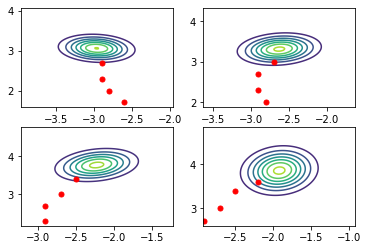

In [22]:
fig = plt.figure()
print(index)

ax1 = fig.add_subplot(221)
xx, yy, pdf = get_confidence_interval_of_target(index)
ax1.contour(xx, yy, pdf)
ax1.plot([input_lat[index]], [input_long[index]], marker = 'o', markersize=5, color="red")

ax2 = fig.add_subplot(222)
xx, yy, pdf = get_confidence_interval_of_target(index+1)
ax2.contour(xx, yy, pdf)
ax2.plot([input_lat[index+1]], [input_long[index+1]], marker = 'o', markersize=5, color="red")

ax3 = fig.add_subplot(223)
xx, yy, pdf = get_confidence_interval_of_target(index+2)
ax3.contour(xx, yy, pdf)
ax3.plot([input_lat[index+2]], [input_long[index+2]], marker = 'o', markersize=5, color="red")

ax4 = fig.add_subplot(224)
xx, yy, pdf = get_confidence_interval_of_target(index+3)
ax4.contour(xx, yy, pdf)
ax4.plot([input_lat[index+3]], [input_long[index+3]], marker = 'o', markersize=5, color="red")